# Import libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

# Import Dataset 

In [2]:
df=pd.read_csv('Liverpool_data_epl_match_details.csv')

In [3]:
df.dtypes

season                  object
contests                object
date_match              object
home_team               object
away_team               object
at_anfield                bool
Goals                    int64
Assists                  int64
Formation               object
Shots                    int64
Shots On Target          int64
Saves                    int64
Penalties won            int64
Penalties scored         int64
Crosses                  int64
Fouls                    int64
Offsides                 int64
Corners                  int64
Yellow Card              int64
Red Cards                int64
Balls touched            int64
Passes                   int64
liverpool_score         object
Interceptions            int64
Blocks                   int64
Catches                  int64
Tackles                  int64
Possession              object
Elo_Liverpool          float64
Elo_Opponent             int64
Elo_Diff               float64
Rest_Days                int64
liverpoo

#### Matchs de Liverpool du début de la saison 2012-2013 à la fin de la saison 2019-2020

In [4]:
df.head()

,season,contests,date_match,home_team,away_team,at_anfield,Goals,Assists,Formation,Shots,...,Elo_Liverpool,Elo_Opponent,Elo_Diff,Rest_Days,liverpool_score_ft,liverpool_score_ht,opponent_score_ft,opponent_score_ht,liverpool_result_ft,liverpool_result_ht
0,2012 - 2013,English Premier League,2012-08-18,West Bromwich Albion FC,Liverpool,False,0,0,4-3-3,16,...,1742.600220,1675,67.600220,6,0,0,3,1,D,D
1,2012 - 2013,English Premier League,2012-08-26,Liverpool,Manchester City,True,2,1,4-3-3,14,...,1729.251587,1918,-188.748413,3,2,1,2,0,N,V
2,2012 - 2013,English Premier League,2012-09-02,Liverpool,Arsenal FC,True,0,0,4-3-3,17,...,1733.523804,1818,-84.476196,3,0,0,2,1,D,D
3,2012 - 2013,English Premier League,2012-09-15,AFC Sunderland,Liverpool,False,1,0,4-2-3-1,23,...,1722.609009,1676,46.609009,13,1,0,1,1,N,D
4,2012 - 2013,English Premier League,2012-09-23,Liverpool,Manchester United,True,1,0,4-3-3,12,...,1732.295288,1914,-181.704712,3,1,0,2,0,D,N


In [5]:
df.tail()

,season,contests,date_match,home_team,away_team,at_anfield,Goals,Assists,Formation,Shots,...,Elo_Liverpool,Elo_Opponent,Elo_Diff,Rest_Days,liverpool_score_ft,liverpool_score_ht,opponent_score_ft,opponent_score_ht,liverpool_result_ft,liverpool_result_ht
299,2019 - 2020,English Premier League,2020-07-08,Brighton & Hove Albion,Liverpool,False,3,3,4-3-3,19,...,2002.940796,1652,350.940796,3,3,2,1,1,V,V
300,2019 - 2020,English Premier League,2020-07-11,Liverpool,Burnley FC,True,1,1,4-3-3,23,...,2005.797241,1725,280.797241,3,1,1,1,0,N,V
301,2019 - 2020,English Premier League,2020-07-15,Arsenal FC,Liverpool,False,1,1,4-3-3,24,...,1998.458008,1800,198.458008,4,1,1,2,2,D,D
302,2019 - 2020,English Premier League,2020-07-22,Liverpool,Chelsea,True,5,3,4-3-3,10,...,1986.608887,1820,166.608887,7,5,3,3,1,V,V
303,2019 - 2020,English Premier League,2020-07-26,Newcastle United FC,Liverpool,False,3,3,4-3-3,14,...,1991.137817,1686,305.137817,4,3,1,1,1,V,N


# Step 1 : Data processing and Exploration

#### On convertit le type des dates

In [6]:
df['date_match'] = pd.to_datetime(df['date_match'])

####  La journée de la saison correspondante

In [7]:
a = [i for i in range(1,39)]*8
df['matchday'] = a

#### Si Liverpool est à domicile 0

In [8]:
df['home_0_away_1'] = df['at_anfield'].apply(lambda x : 0 if x else 1)

####  Nb points gagnes

In [9]:
df['points_won'] = df['liverpool_result_ft'].apply(lambda x : 0 if x == "D" else( 1  if x == "N" else 3))

#### Conversion de la possession pour pouvoir l'utiliser

In [10]:
df['Possession']=df['Possession'].str.replace('%','')
df['Possession']=df['Possession'].astype(int)

#### Nombre de buts marqués cumulés dans la saison

In [11]:
a=pd.Series()
for i in range(0,304,38):
    a=a.append(df['Goals'][i:i+38].transform(lambda g :g.cumsum()))
df['cumulativeGoalsScored']=a

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


#### Nombre de buts encaissés cumulés dans la saison

In [12]:
a=pd.Series()
for i in range(0,304,38):
    a=a.append(df['opponent_score_ft'][i:i+38].transform(lambda g :g.cumsum()))
df['cumulativeGoalsConceided']=a

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


####  Si Liverpool a un meilleur Elo -> 'Liv meilleur', sinon 'Liv moins fort'

In [13]:
df['isLivBest'] = df['Elo_Diff'].apply(lambda x : 'Liverpool meilleur' if x>0 else 'Liverpool moins fort')

On vérifie qu'il n'y ait pas de valeurs nulles

In [14]:
df.isna().sum()

season                      0
contests                    0
date_match                  0
home_team                   0
away_team                   0
at_anfield                  0
Goals                       0
Assists                     0
Formation                   0
Shots                       0
Shots On Target             0
Saves                       0
Penalties won               0
Penalties scored            0
Crosses                     0
Fouls                       0
Offsides                    0
Corners                     0
Yellow Card                 0
Red Cards                   0
Balls touched               0
Passes                      0
liverpool_score             0
Interceptions               0
Blocks                      0
Catches                     0
Tackles                     0
Possession                  0
Elo_Liverpool               0
Elo_Opponent                0
Elo_Diff                    0
Rest_Days                   0
liverpool_score_ft          0
liverpool_

## Variables prensentation
Here are all the columns of the DataSet :  

<li>season : The years season during which the game is played, type : str                  
<li>contests : THe competition of the played game, type : str
<li>date_match: The date of the game, type : dateTime
<li>home_team: home team, type : str
<li>away_team: away team, type : str            
<li>at_anfield : If it is at anfield, type : bool
<li>Goals : Goals scored by Liverpool, type : int
<li>Assists: Assists made by a Liverpool player, type : int
<li>Formation: Liverpool formation, type : str
<li>Shots: Liverpool shots, type : int
<li>Shots On Target: by Liverpool, type : int
<li>Saves: by Liverpool goalkeeper, type : int
<li>Penalties won: by Liverpool , type: int
<li>Penalties scored: by Liverpool, type : int
<li>Crosses: centers made by Liv, type : int
<li>Fouls: commited by Liv players, type : int
<li>Offsides: by Liv players, type : int
<li>Corners: won by Liv, type : int
<li>Yellow Card: Sum of yellow cards of Liv players, type : int
<li>Red Cards: Sum of yellow cards of Liv players, type : int
<li>Balls touched: Sum of balls touched by Liverpool, type : int
<li>Passes: Sum of passes for Liverpool, type : int
<li>liverpool_score: Victoire-Nul-Defaite, type : str
<li>Interceptions: Sum of interceptions for Liv, type : int
<li>Blocks: Balls blocked, type : int
<li>Catches: Ballons attrapés par le gardien, type : int
<li>Tackles: Nombre de tacles pour Liverpool, type : int
<li>Possession: % de possession pour Liverpool, type : int
<li>Elo_Liverpool: Elo de Liverpool, type : float
<li>Elo_Opponent: Elo de l'adversaire, type : float
<li>Elo_Diff: Elo_Liverpool-Elo_Opponent , type : float
<li>Rest_Days: Jours de repos avant le match, type : int
<li>liverpool_score_ft: nombre de buts marqués à la fin du match par Liverpool, type : int
<li>liverpool_score_ht: nombre de buts marqués a la mi-temps par Liverpool, type : int
<li>opponent_score_ft: nombre de buts marqués à la fin du match par l'adversaire, type : int
<li>opponent_score_ht: nombre de buts marqués a la mi-temps par l'adversaire, type : int
<li>liverpool_result_ft: Vitoire-Nul-Défaite à la fin du match pour Liverpool, type : str
<li>liverpool_result_ht:  Vitoire-Nul-Défaite à la mi-temps pour Liverpool, type : str
<li>matchday: journée du match 1 à 38, type : int
<li>home_0_away_1: 0 si domicile 1 si extérieur, bool
<li>points_won: Nombre de points gagnés à la fin du match par Liv, type : int
<li>cumulativeGoalsScored: Nombre de buts marqués par Liverpool jusque là dans la saison, type : int
<li>cumulativeGoalsConceided: Nombre de buts encaisés par Liverpool jusque là dans la saison, type : int

    
       

### Let's look for correlations between variables

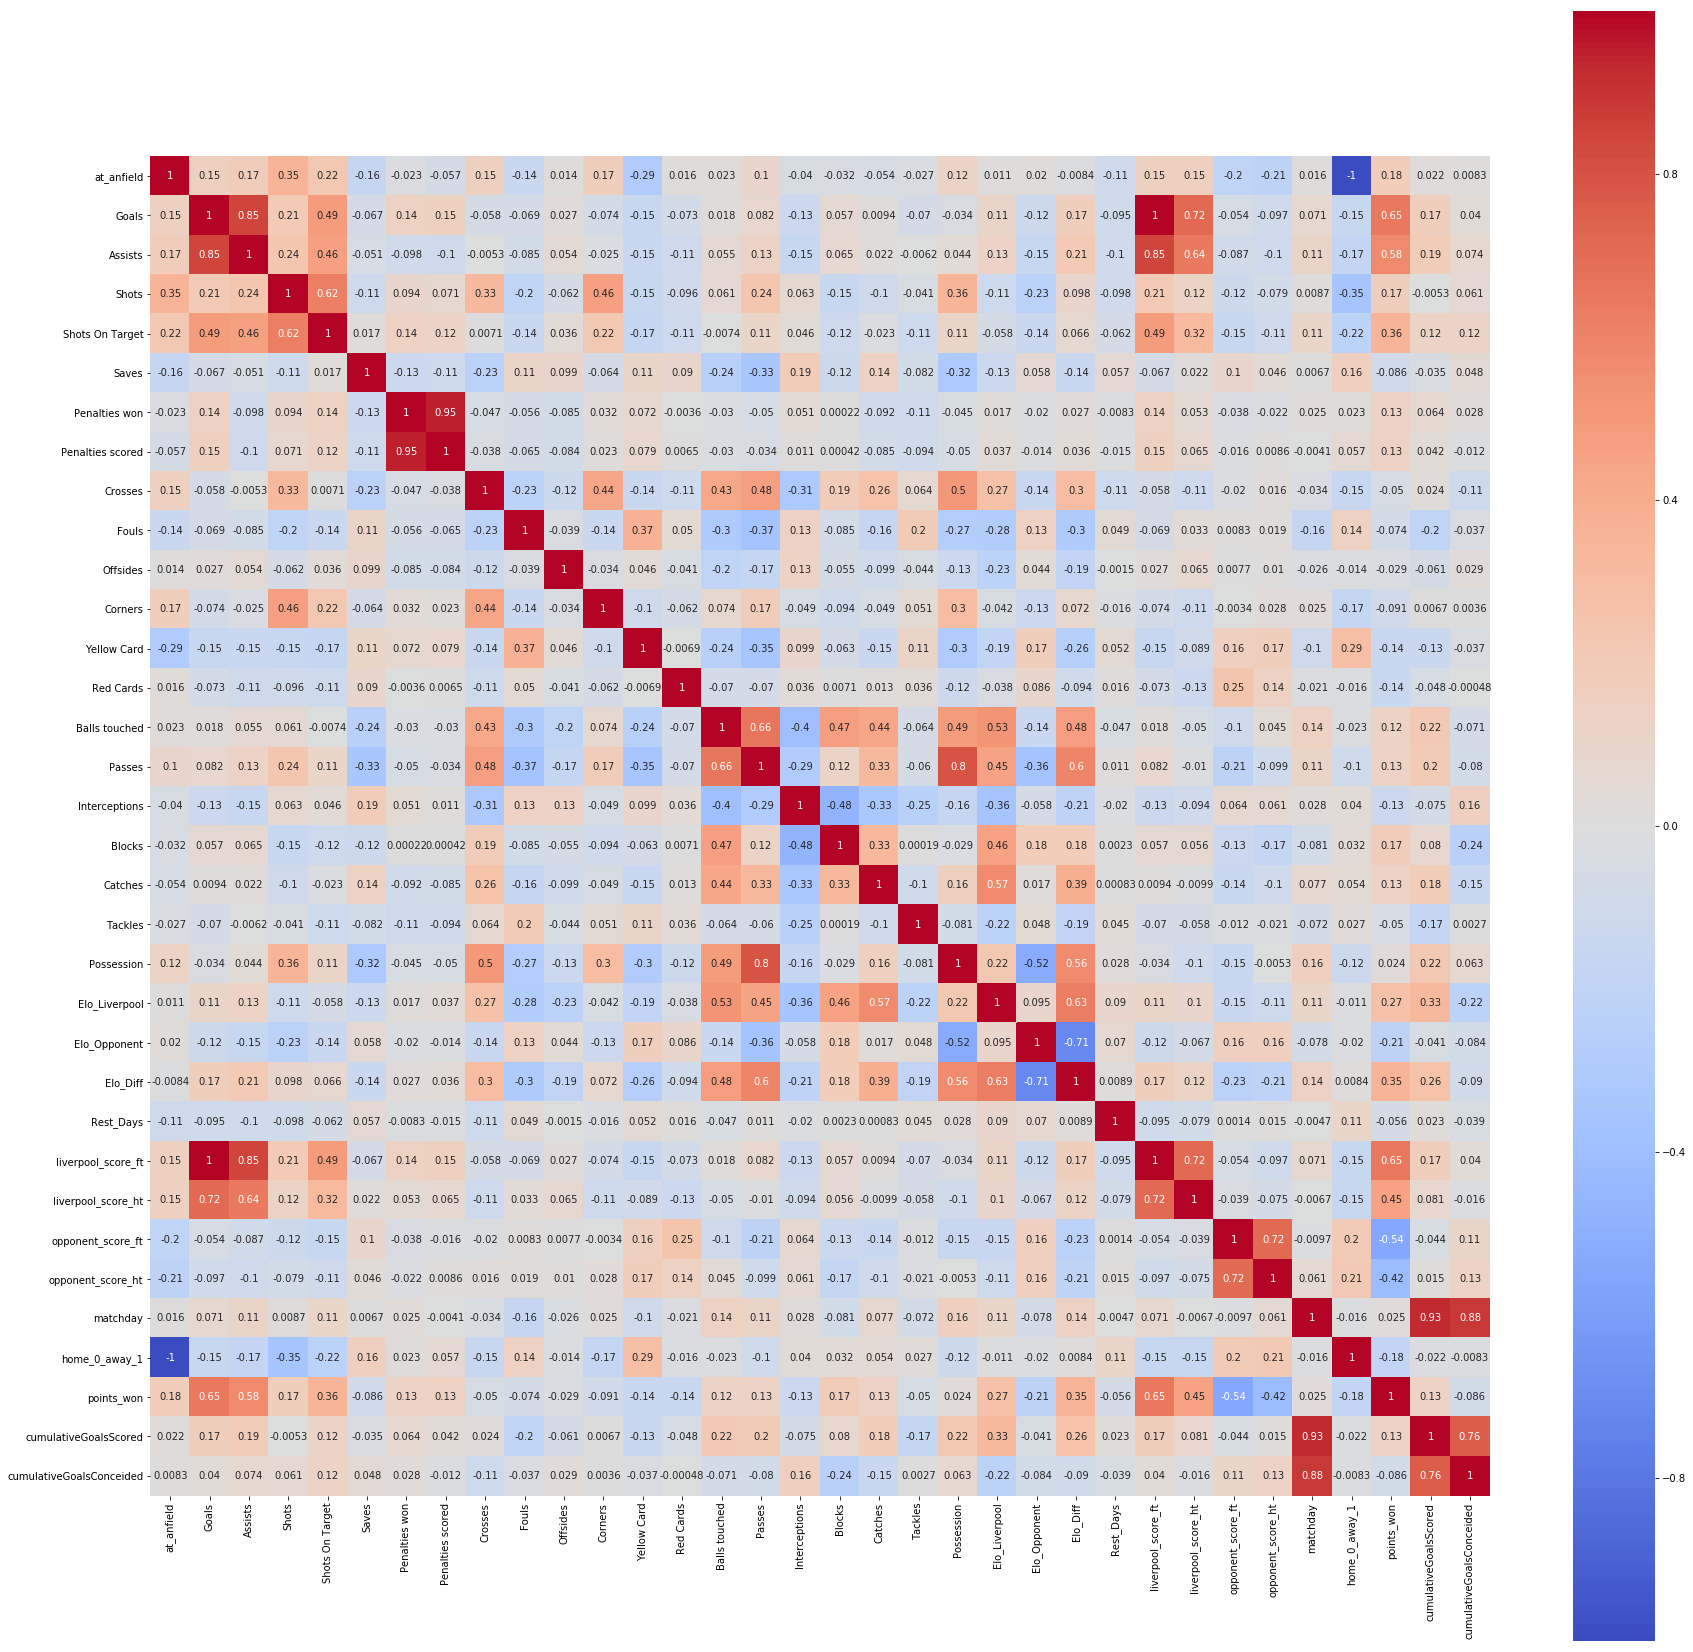

In [15]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

#####  Get sorted list of correlations

In [16]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['points_won'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
points_won,1.000000
liverpool_score_ft,0.649147
Goals,0.649147
Assists,0.576826
liverpool_score_ht,0.453745
Shots On Target,0.357793
Elo_Diff,0.352850
Elo_Liverpool,0.267173
at_anfield,0.181865
Blocks,0.174347


### features : at_anfield,Goals,Assists,Shots,Shots On Target,Saves,Crosses,Fouls,Offsides,Yellow Card,Red Cards,Balls touched ,Passes,Interceptions,Blocks,Catches,Tackles,Possession,Elo_Diff,Rest_Days

# Step 2 : Data Preparation and data Visualisation using Matplotlib and seaborn

Visualisation des résultats de Liverpool par saison

Text(0.5, 1.0, 'Results of the teams according to the season')

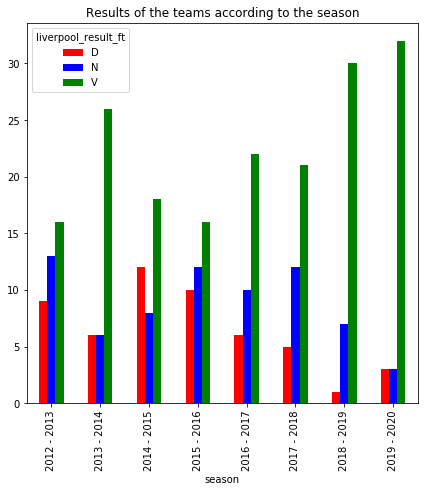

In [80]:
df1plot=df.groupby('season')['liverpool_result_ft'].value_counts()
df1plot.unstack().plot(kind='bar',color=('r','b','g'),figsize=(7,7))
plt.title('Results of the teams according to the season')

#### Quand Liverpool gagne :
<br>
<li>ils cadrent plus 
<li>commettent moins de fautes
<li>moins de cartons jaunes 
<li>ont moins de jours de repos que d'habitude

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

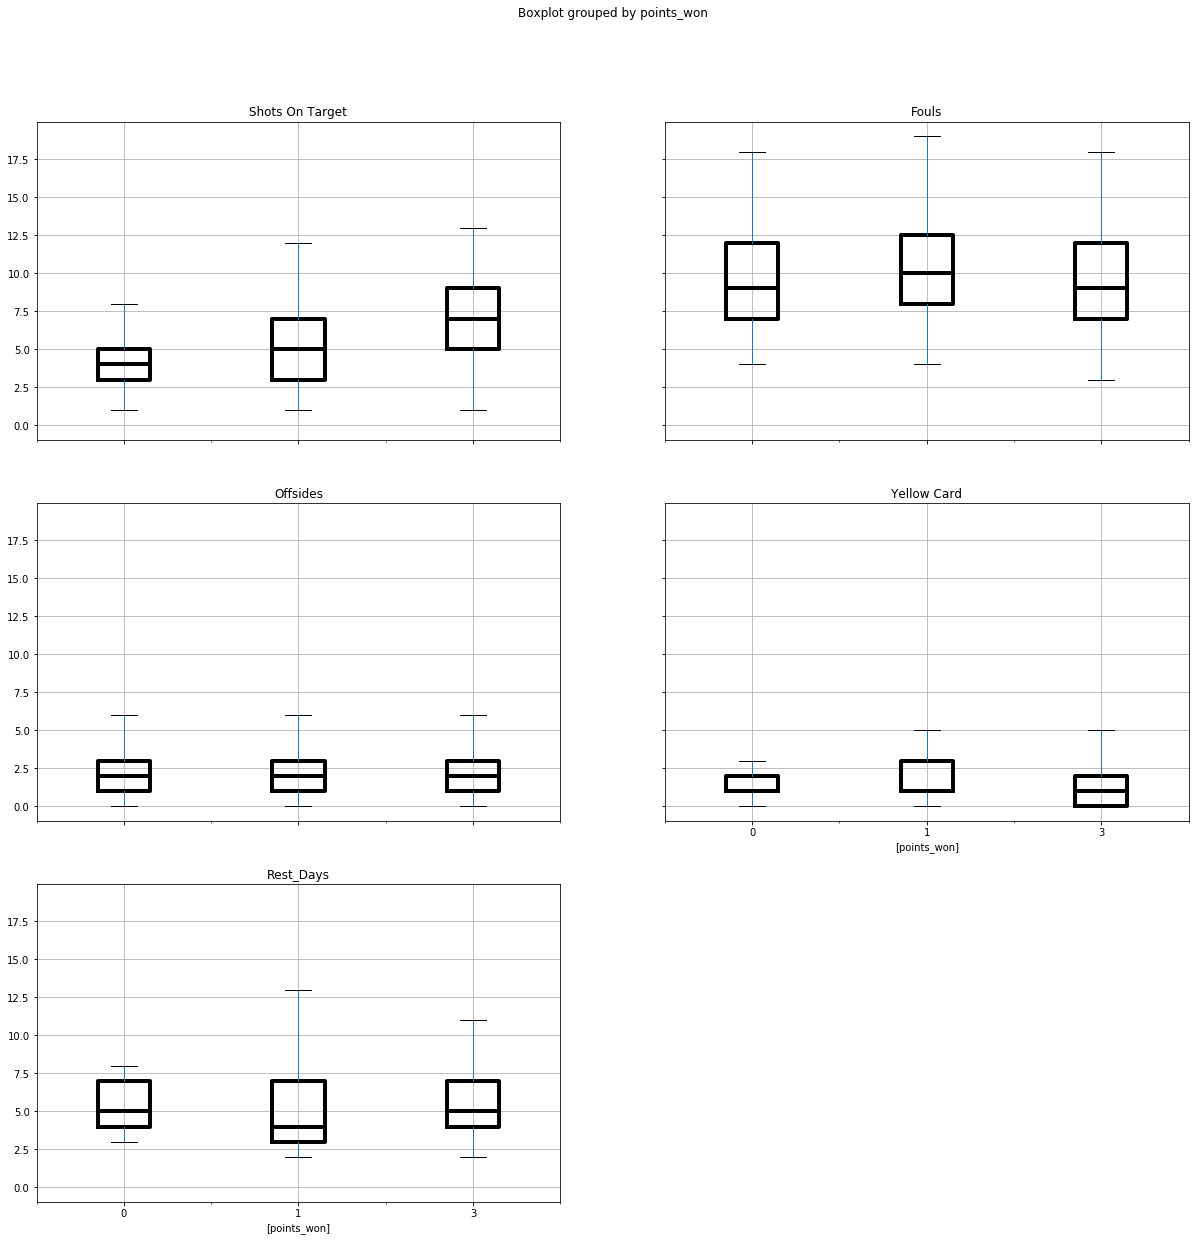

In [82]:
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')
boxplotdf = df.boxplot(['Shots On Target',
                            'Fouls','Offsides','Yellow Card',
           'Rest_Days'],by=['points_won'],figsize=(20,20),showfliers=False,showmeans=False,
                boxprops=boxprops,
                medianprops=medianprops)




Liverpool touche plus de ballons quand ils gagnent, la médiane de ballons touchés est à environ 1400 for un match gagné et envrion 800 ballons touchés pour les matchs nuls et les défaites

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


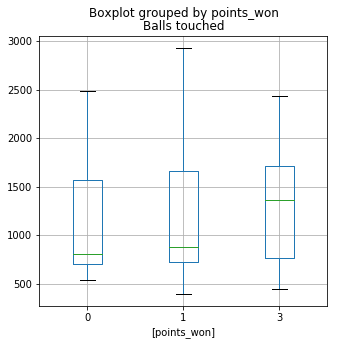

In [19]:
boxplotdf1 = df.boxplot(['Balls touched'],by=['points_won'],figsize=(5,5),showfliers=False)

Liverpool is more used to win when they do more passes during the match and more when they have a better Elo than his opponent

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


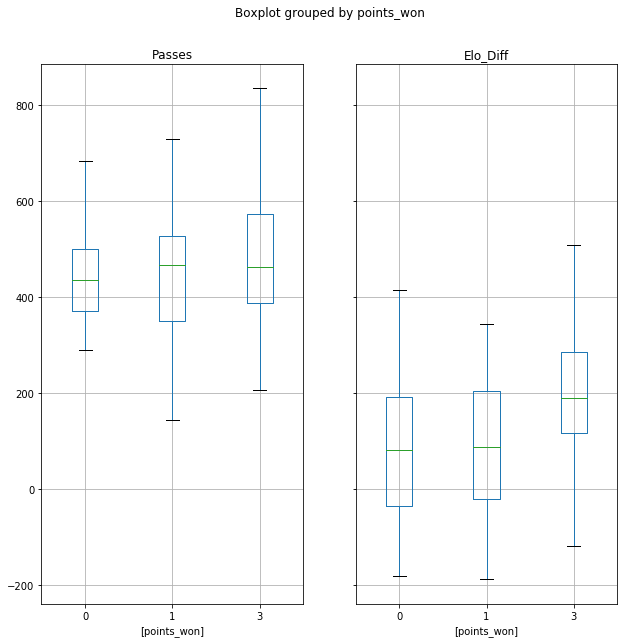

In [84]:
boxplotdf2 = df.boxplot(['Passes','Elo_Diff'],by=['points_won'],figsize=(10,10),showfliers=False)


#### Possession has no influence for them for the result

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


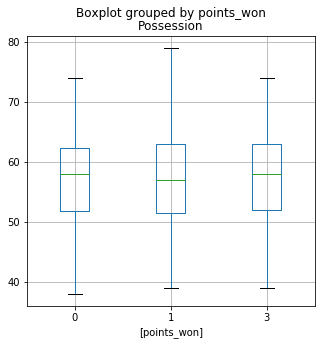

In [85]:
boxplotdf = df.boxplot(['Possession'],by=['points_won'],figsize=(5,5),showfliers=False)

#### More wins for Liverpool when they make less crosses, less shots, more blocks, less tackles

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

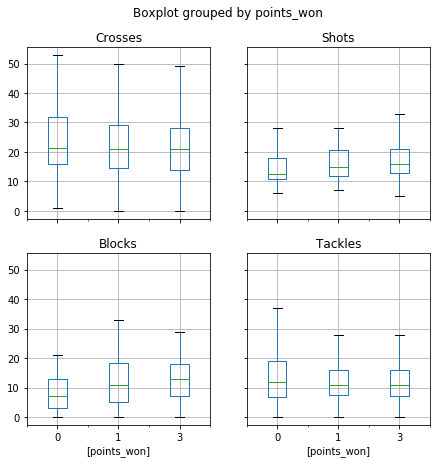

In [23]:
boxplotdf = df.boxplot(['Crosses','Shots','Blocks','Tackles'],by=['points_won'],figsize=(7,7),showfliers=False)

#### Let's see  what is the influence of playing at home for Liverpool
We can see that since 2017 they never lost at home

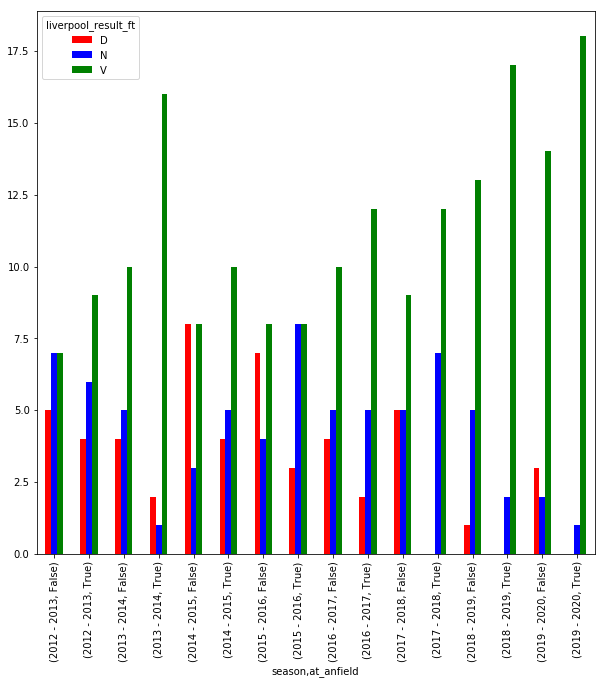

In [24]:
df2plot=df.groupby(['season','at_anfield'])['liverpool_result_ft'].value_counts()
df2plot.unstack(level=2).plot(kind='bar',color=('r','b','g'),figsize=(10,10))

#### There are 2 principal formations that are used which are 4-2-3-1 and 4-3-3.
The 4-3-3 is the most used and they have a high rate of wins with this formation

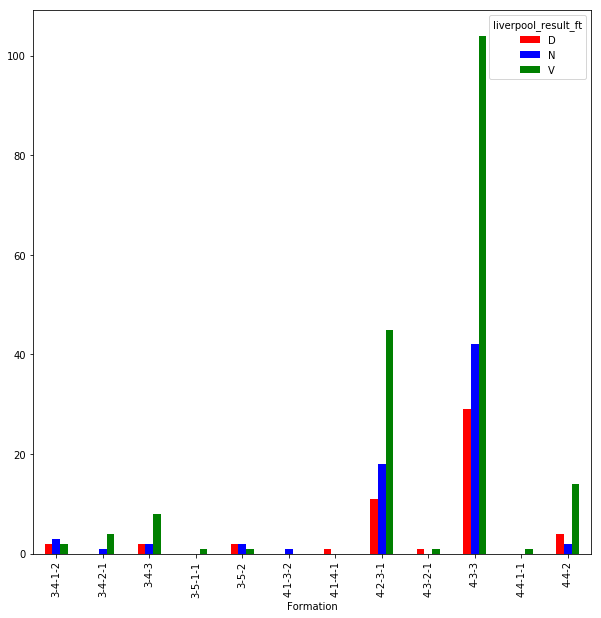

In [25]:
df3plot=df.groupby(['Formation'])['liverpool_result_ft'].value_counts()
df3plot.unstack().plot(kind='bar',color=('r','b','g'),figsize=(10,10))

#### Liverpool gagne bcp contre les équipes moins fortes et ne gagne pas bcp contre les équipes plus fortes qu'elle
#### Cependant Liverpool perd le plus contre des équipes moins forte qu'elle

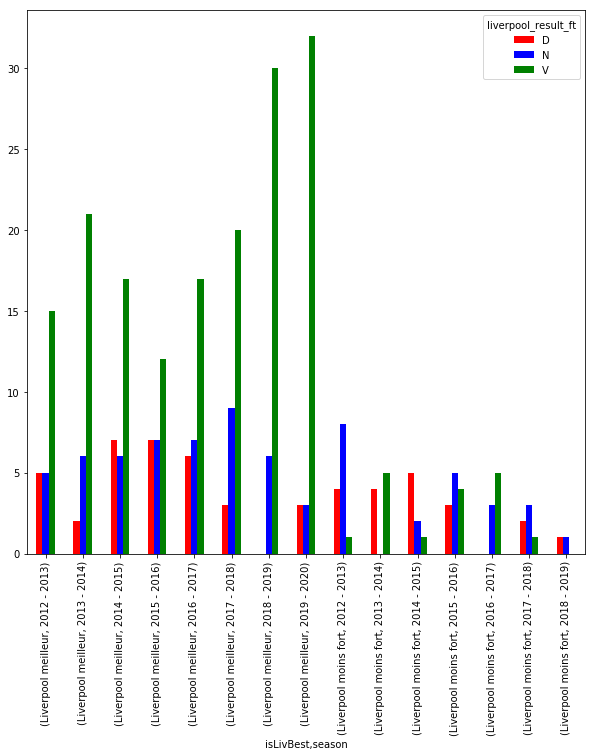

In [26]:
df4plot=df.groupby(['isLivBest','season'])['liverpool_result_ft'].value_counts()
df4plot.unstack().plot(kind='bar',color=('r','b','g'),figsize=(10,10))

### Ajouter la colonne entraineur

In [32]:
df['Entraineur'] = df['date_match'].apply(lambda x : "Klopp" if x>datetime.date(2018,10,8) else "Rodgers")

Pourcentage de victoire selon l'entraineur : 
<li> On voit que Klopp a un pourcentage de victoire beaucoup plus haut que celui de Rodgers. 
<li>Klopp a une proportion de matchs nuls qui est 2 fois inférieure à celle de Rodgers.
<li>Et le taux de défaite de Klopp est 3 à 4 fois inférieur que Rodgers.
   

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002864607D048>,
      dtype=object)

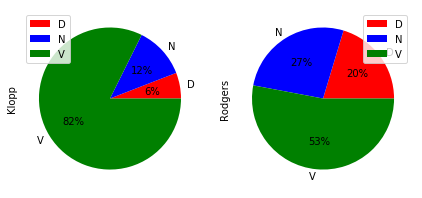

In [57]:
df1plot=df.groupby('Entraineur')['liverpool_result_ft'].value_counts()
df1plot.unstack(level=0).plot.pie(subplots=True,colors=('r','b','g'), figsize=(7,7),autopct='%1.0f%%')

<br><br><br>
With Klopp the median  of shots on target by match is approximately 7 which is equivalent to Rodgers's. <br>
But there is a big difference, Rodgers's team are more aggressive than Klopp's, they do 10 fouls against 7 for Klopp's.

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


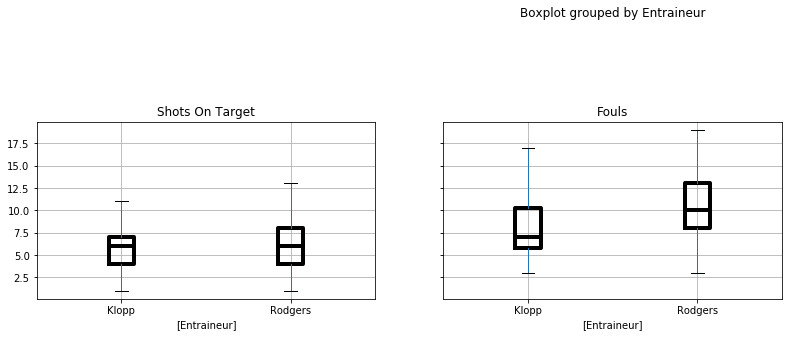

In [78]:
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')

boxplotdf = df.boxplot(['Shots On Target',
                            'Fouls'
           ],by=['Entraineur'],figsize=(20,20),showfliers=False,showmeans=False,
                boxprops=boxprops,
                medianprops=medianprops,layout=(4,3))

plt.subplots_adjust(hspace = 0.7)

<br><br><br><br>Le jeu de Klopp est beaucoup plus basé sur le contrôle du jeu avec environ 1700 ballons touchés dans un match tandis que pour Rodgers il y en a environ que 800 par match

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


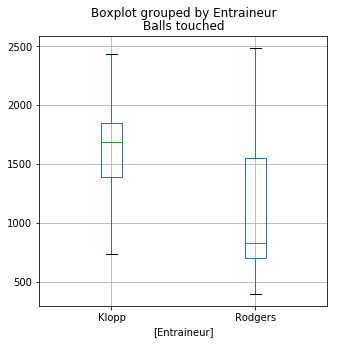

In [76]:
boxplotdf1 = df.boxplot(['Balls touched'],by=['Entraineur'],figsize=(5,5),showfliers=False)


<br><br><br>
Under Jurgen Klopp, Liverpool does a lot more passes by match approximately 580 passes whereas under Rodgers they do 450 passes <br>
That's why under Klopp they are the favorite winner in the opposition

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


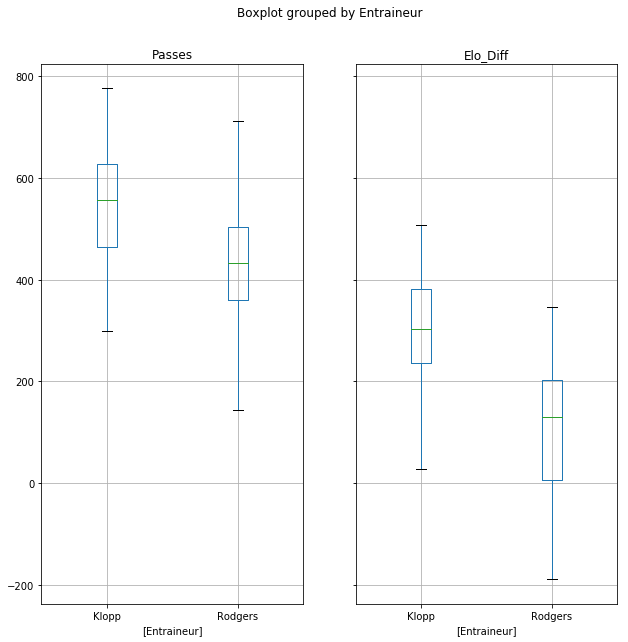

In [79]:
boxplotdf2 = df.boxplot(['Passes','Elo_Diff'],by=['Entraineur'],figsize=(10,10),showfliers=False)

Possession under Klopp is around 62% by match which means that they have a lot of control on the match. Rodgers also has a lot of control whi a median of 57% by match

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


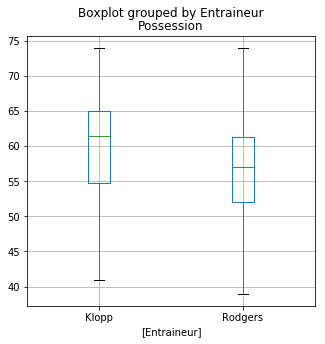

In [87]:
boxplotdf = df.boxplot(['Possession'],by=['Entraineur'],figsize=(5,5),showfliers=False)

<br><br><br>
Offensively Klopp's team are more offensive they do more crosses and shots than Rodgers's. <br>
Denfensively Rodgers's team are more aggressive but it doesn't mean that they defend better.

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

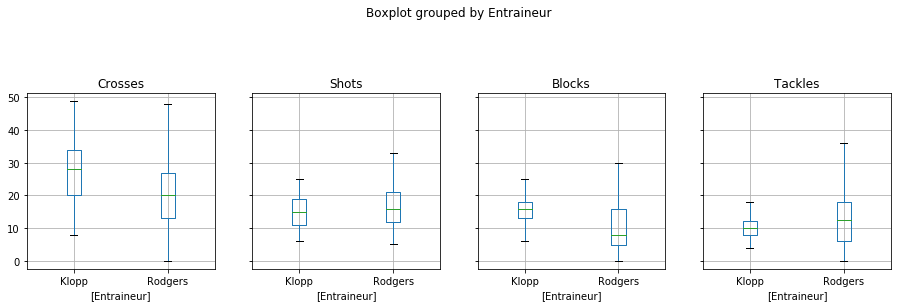

In [91]:
boxplotdf = df.boxplot(['Crosses','Shots','Blocks','Tackles'],by=['Entraineur'],figsize=(15,15),showfliers=False,layout=(4,4))